# Compreendendo a estrutura do dataset

Dicionário das varíaveis


id: Identificador único da listagem.

listing_url: URL da página da listagem na plataforma.

scrape_id: Identificador único da operação de coleta de dados (scrape).

last_scraped: Data da última vez que os dados foram coletados.

name: Nome da propriedade.

summary: Resumo curto da propriedade.

space: Descrição do espaço da propriedade, incluindo áreas comuns e privadas.

description: Descrição detalhada da propriedade, incluindo comodidades e características.

experiences_offered: Indica se experiências (atividades) são oferecidas juntamente com a estadia.

neighborhood_overview: Visão geral do bairro onde a propriedade está localizada.

minimum_minimum_nights: Número mínimo de noites exigido pela reserva mínima mais baixa permitida.

maximum_minimum_nights: Número máximo de noites exigido pela reserva mínima mais baixa permitida.

minimum_maximum_nights: Número mínimo de noites exigido pela reserva máxima mais alta permitida.

maximum_maximum_nights: Número máximo de noites exigido pela reserva máxima mais alta permitida.

minimum_nights_avg_ntm: Média do número mínimo de noites exigido para reservas no próximo mês.

maximum_nights_avg_ntm: Média do número máximo de noites permitido para reservas no próximo mês.

number_of_reviews_ltm: Número de avaliações recebidas nos últimos doze meses.

calculated_host_listings_count_entire_homes: Número de propriedades inteiras listadas pelo anfitrião.

calculated_host_listings_count_private_rooms: Número de quartos privados listados pelo anfitrião.

calculated_host_listings_count_shared_rooms: Número de quartos compartilhados listados pelo anfitrião.

host_is_superhost: Indica se o anfitrião é um "superhost" ou não. Um superhost é um anfitrião experiente e altamente avaliado que proporciona estadias excepcionais para seus hóspedes.

host_listings_count: Número total de listagens (propriedades) que o anfitrião possui na plataforma.

latitude: Latitude da localização da propriedade.

longitude: Longitude da localização da propriedade.

accommodates: Número de hóspedes que a propriedade pode acomodar.

bathrooms: Número de banheiros na propriedade.

bedrooms: Número de quartos na propriedade.

beds: Número de camas na propriedade.

extra_people: Custo adicional por hóspede extra acima do número de hóspedes permitido.

minimum_nights: Número mínimo de noites que um hóspede deve reservar.

number_of_reviews: Número total de avaliações recebidas pela propriedade.

instant_bookable: Indica se a propriedade pode ser reservada instantaneamente, sem a necessidade de aprovação prévia do anfitrião.

amenities: Amenidades disponíveis na propriedade.

property_type - Indica o tipo de propriedade.

room_type - Indica o tipo de quarto.

cancellation_policy: Indica o tipo de política de cancelamento.

price: Preço da propriedade por noite (target).






In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "/content/train.csv"
test = '/content/test.csv'
df = pd.read_csv(file_path,engine = 'python', on_bad_lines = 'skip')
test_df = pd.read_csv(test, engine='python', on_bad_lines='skip')
df.info()
print(df.isnull().sum())
test_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588091 entries, 0 to 588090
Data columns (total 37 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   id                                            588091 non-null  object 
 1   listing_url                                   588091 non-null  object 
 2   scrape_id                                     588090 non-null  float64
 3   last_scraped                                  588091 non-null  object 
 4   name                                          586971 non-null  object 
 5   summary                                       558441 non-null  object 
 6   space                                         355819 non-null  object 
 7   description                                   574567 non-null  object 
 8   experiences_offered                           588091 non-null  object 
 9   neighborhood_overview                         31

#Selecionando as colunas que serão utilizadas para a analíse

Nesse contexto, foram levados em conta, primeiramente, colunas que influenciam diretamente na analíse de previsão de preço e, por fim, colunas que não apresentem um alto número de valores faltantes (gerando problemas na imputação de valores faltantes). Para isso, colunas que apresentassem mais de 30% dos valores como nulos foram descartadas.


In [ ]:
cols = [
    "id",
    "number_of_reviews",
    "host_is_superhost",
    "host_listings_count",
    "latitude",
    "longitude",
    "accommodates",
    "bedrooms",
    "beds",
    "bathrooms",
    "extra_people",
    "minimum_nights",
    "instant_bookable",
    "property_type",
    "room_type",
    "amenities",
    "cancellation_policy",
    "price"
]
new_df = df[cols]
new_df.info()
for column in new_df:
    if new_df[column].isna().sum() > 70000:
        new_df = new_df.drop(column,axis=1)

print(new_df.isna().sum())
print(new_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588091 entries, 0 to 588090
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   588091 non-null  object 
 1   number_of_reviews    588091 non-null  float64
 2   host_is_superhost    587797 non-null  object 
 3   host_listings_count  587797 non-null  object 
 4   latitude             588091 non-null  float64
 5   longitude            588091 non-null  float64
 6   accommodates         588091 non-null  object 
 7   bedrooms             587499 non-null  float64
 8   beds                 586332 non-null  float64
 9   bathrooms            586965 non-null  float64
 10  extra_people         588091 non-null  object 
 11  minimum_nights       588091 non-null  object 
 12  instant_bookable     588090 non-null  object 
 13  property_type        588091 non-null  object 
 14  room_type            588091 non-null  object 
 15  amenities        

#Inputação de dados faltantes e conversão de tipos de dados
Agora, separadas as colunas que serão utilizadas, faz-se necessário imputar os valores faltantes. Para isso, como grande parte dos mesmos classificam-se como Missing Complete at Random, será realizada a imputação utilizando medidas de tendência central (Média e Moda)


In [ ]:
#efetuando alterações na colunas do tipo object que deveriam ser classificadas como dados numéricos"
for column in new_df:
  if column in ['price', 'minimum_nights', 'extra_people', 'host_listings_count', 'accommodates']:
      if new_df[column].dtype == 'object':
          new_df[column] = new_df[column].str.replace('$','')
          new_df[column] = new_df[column].str.replace(',','')
          new_df[column] = pd.to_numeric(new_df[column], errors='coerce')
          new_df[column] = new_df[column].astype(np.float64, copy=False)

for column in new_df.columns:
    if new_df[column].dtype == 'object':
        # Preencher valores faltantes com a moda (valor mais frequente)
        mode_value = df[column].mode()[0]
        new_df[column].fillna(mode_value, inplace=True)
    elif new_df[column].dtype in ['float64']:
        # Preencher valores faltantes com a média
        mean_value = new_df[column].mean()
        new_df[column].fillna(mean_value, inplace=True)
print(new_df.dtypes)
print(new_df.isna().sum())
print(new_df.info())

<ipython-input-3-370e8e73afc1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[column] = new_df[column].str.replace('$','')
<ipython-input-3-370e8e73afc1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[column] = new_df[column].str.replace(',','')
<ipython-input-3-370e8e73afc1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/p

id                      object
number_of_reviews      float64
host_is_superhost       object
host_listings_count    float64
latitude               float64
longitude              float64
accommodates           float64
bedrooms               float64
beds                   float64
bathrooms              float64
extra_people           float64
minimum_nights         float64
instant_bookable        object
property_type           object
room_type               object
amenities               object
cancellation_policy     object
price                  float64
dtype: object
id                     0
number_of_reviews      0
host_is_superhost      0
host_listings_count    0
latitude               0
longitude              0
accommodates           0
bedrooms               0
beds                   0
bathrooms              0
extra_people           0
minimum_nights         0
instant_bookable       0
property_type          0
room_type              0
amenities              0
cancellation_policy    0
pri

#Identificando outliers (Utilizando o metódo do intervalo interquartil)




In [ ]:
def percentile(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    IQR = q3 - q1
    inf_limit = q1 - (1.5 * IQR)
    sup_limit = q3 + (1.5 * IQR)
    return inf_limit, sup_limit

def exclude_outliers(df, column_name):
    lines_quantity = df.shape[0]
    inf_limit, sup_limit = percentile(df[column_name])
    df = df.loc[(df[column_name] >= inf_limit) & (df[column_name] <= sup_limit), :]
    removed_lines = lines_quantity - df.shape[0]
    return df, removed_lines


def box_plot(columns): # plotar o box plot (diagrama de caixa)
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(8.9, 3)
    sns.boxplot(x=columns, ax=ax1)
    ax2.set_xlim(percentile(columns))
    sns.boxplot(x=columns, ax=ax2)

    ax1.title.set_text('Com outliers')
    ax2.title.set_text('Sem outliers')
print(new_df.isna().sum())

id                     0
number_of_reviews      0
host_is_superhost      0
host_listings_count    0
latitude               0
longitude              0
accommodates           0
bedrooms               0
beds                   0
bathrooms              0
extra_people           0
minimum_nights         0
instant_bookable       0
property_type          0
room_type              0
amenities              0
cancellation_policy    0
price                  0
dtype: int64


Verificação e remoção de outliers em dados numéricos

id                     0
number_of_reviews      0
host_is_superhost      0
host_listings_count    0
latitude               0
longitude              0
accommodates           0
bedrooms               0
beds                   0
bathrooms              0
extra_people           0
minimum_nights         0
instant_bookable       0
property_type          0
room_type              0
amenities              0
cancellation_policy    0
price                  0
dtype: int64


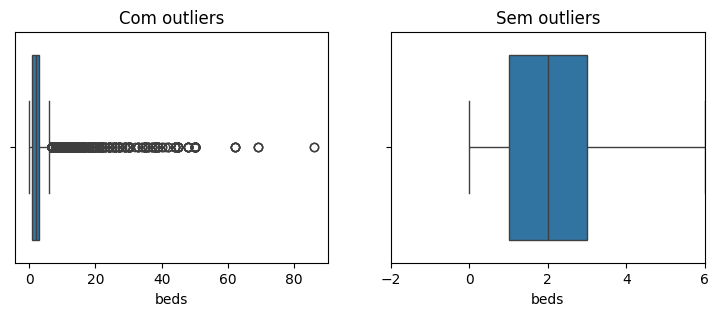

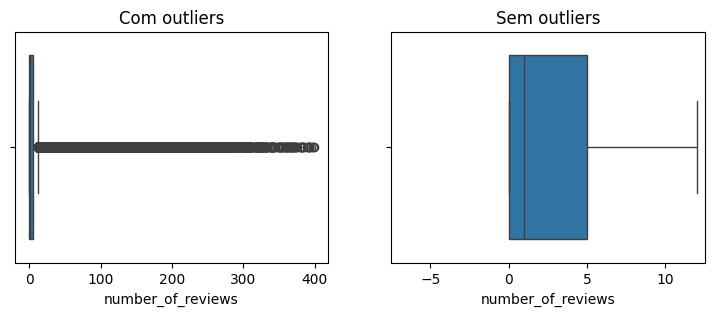

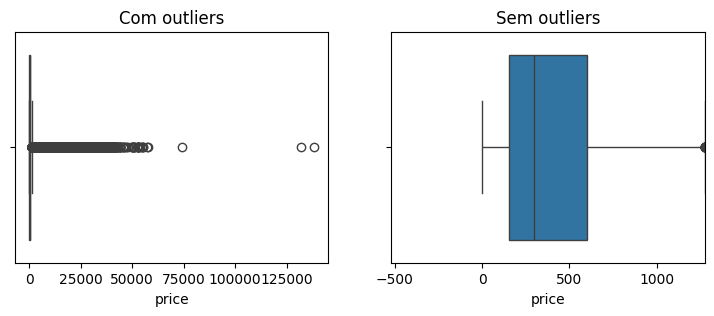

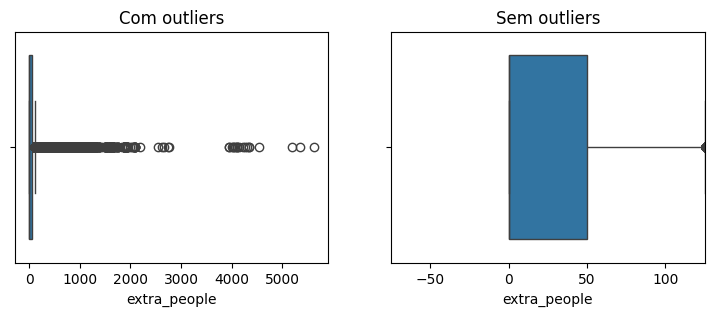

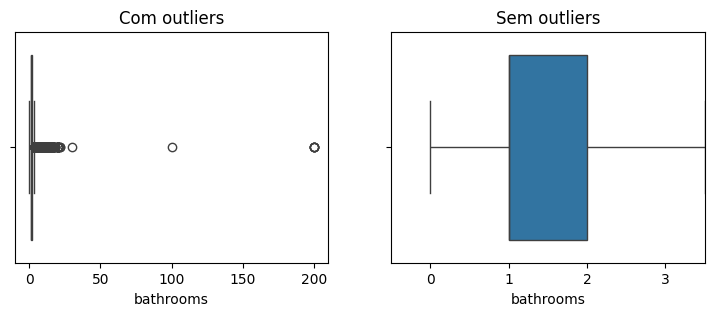

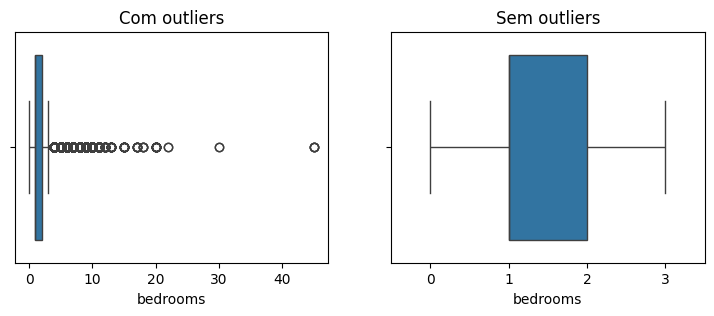

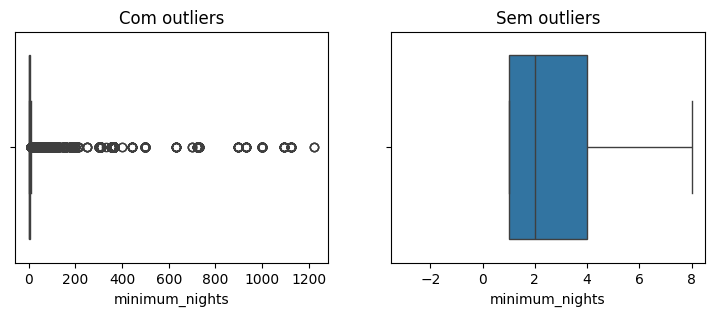

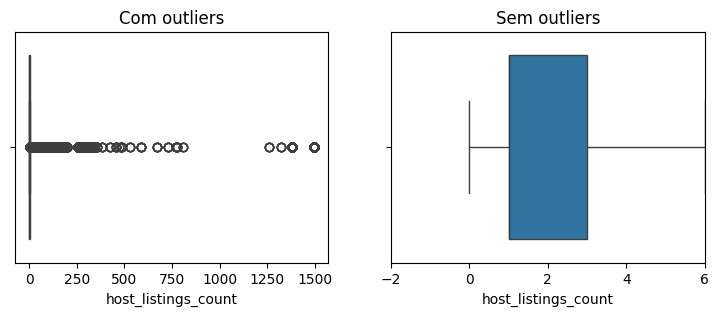

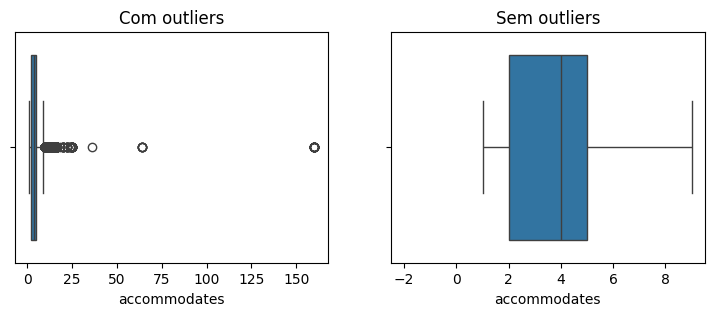

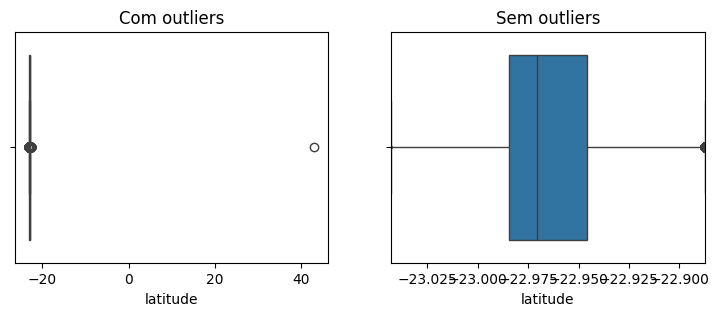

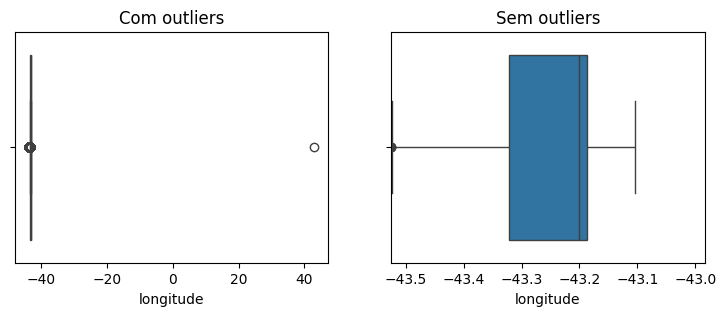

In [ ]:
box_plot(new_df['beds'])
box_plot(new_df['number_of_reviews'])
box_plot(new_df['price'])
box_plot(new_df['extra_people'])
box_plot(new_df['bathrooms'])
box_plot(new_df['bedrooms'])
box_plot(new_df['minimum_nights'])
box_plot(new_df['host_listings_count'])
box_plot(new_df['accommodates'])
box_plot(new_df['latitude'])
box_plot(new_df['longitude'])
print(new_df.isna().sum())

Nota-se que, dos dados númericos, os unicos que de fato não apresentam uma quantidade significativa de outliers são os que dizem respeito as coordenadas geográficas. Portanto, iremos exclui-lós da remoção.

In [ ]:
new_df, removed_lines = exclude_outliers(new_df, 'beds')
new_df, removed_lines = exclude_outliers(new_df, 'number_of_reviews')
new_df, removed_lines = exclude_outliers(new_df, 'price')
new_df, removed_lines = exclude_outliers(new_df, 'extra_people')
new_df, removed_lines = exclude_outliers(new_df, 'bathrooms')
new_df, removed_lines = exclude_outliers(new_df, 'bedrooms')
new_df, removed_lines = exclude_outliers(new_df, 'minimum_nights')
new_df, removed_lines = exclude_outliers(new_df, 'host_listings_count')
new_df, removed_lines = exclude_outliers(new_df, 'accommodates')
print(f'Foram removidas {removed_lines} linhas')
print(new_df.isna().sum())

Foram removidas 7588 linhas
id                     0
number_of_reviews      0
host_is_superhost      0
host_listings_count    0
latitude               0
longitude              0
accommodates           0
bedrooms               0
beds                   0
bathrooms              0
extra_people           0
minimum_nights         0
instant_bookable       0
property_type          0
room_type              0
amenities              0
cancellation_policy    0
price                  0
dtype: int64


Verificando a distribuição dos dados nas colunas de dados categóricos

In [ ]:
for column in new_df:
    if new_df[column].dtype == 'object':
        print(f'Coluna: {column}')
        print(new_df[column].value_counts())
print(new_df.isna().sum())

Coluna: id
id
14076652    22
761468      22
10316794    22
13562223    22
2645102     22
            ..
15615484     1
31985724     1
25474393     1
34095254     1
36649968     1
Name: count, Length: 40309, dtype: int64
Coluna: host_is_superhost
host_is_superhost
f    302179
t     12657
Name: count, dtype: int64
Coluna: instant_bookable
instant_bookable
f    195043
t    119793
Name: count, dtype: int64
Coluna: property_type
property_type
Apartment                 245907
House                      30607
Condominium                15448
Serviced apartment          5694
Loft                        5587
Guest suite                 2031
Bed and breakfast           1887
Hostel                      1581
Guesthouse                  1183
Other                        998
Villa                        776
Townhouse                    490
Tiny house                   348
Earth house                  314
Aparthotel                   311
Chalet                       286
Boutique hotel               2

Nota-se que, o grande desafio será lidar com a coluna amenities. Para as outras colunas, será necessário somente unificar dados de modo a reduzir o número de categorias redundantes

In [ ]:
#unificando dados redundantes na coluna tipos de propriedade
property_type = new_df['property_type']
# Categorias permitidas
allowed_types = ["Condominium", "House", "Apartment"]
# Atualizando a coluna para conter "Other" para categorias não permitidas
new_df['property_type'] = new_df['property_type'].apply(lambda x: x if x in allowed_types else 'Other')

# Verificando a contagem das categorias
grouped_property_type = new_df['property_type'].value_counts().sort_index(ascending=False)
print(grouped_property_type)


#de maneira analóga, vamos fazer isso na coluna politica de cancelamento
cancellation_policy = new_df['cancellation_policy']
cancellation_policy_counts = cancellation_policy.value_counts()
restrito = cancellation_policy_counts[cancellation_policy_counts < 100].index
new_df.loc[new_df['cancellation_policy'].isin(restrito), 'cancellation_policy'] = 'strict'
grouped_cancellation_policy = new_df['cancellation_policy'].value_counts().sort_index(ascending=False)

new_df['cancellation_policy'] = new_df['cancellation_policy'].replace({'strict_14_with_grace_period': 'strict with grace period'})
print(grouped_cancellation_policy)

print(new_df.isna().sum())


property_type
Other           22874
House           30607
Condominium     15448
Apartment      245907
Name: count, dtype: int64
cancellation_policy
strict_14_with_grace_period     99908
strict                            103
moderate                        55732
flexible                       159093
Name: count, dtype: int64
id                     0
number_of_reviews      0
host_is_superhost      0
host_listings_count    0
latitude               0
longitude              0
accommodates           0
bedrooms               0
beds                   0
bathrooms              0
extra_people           0
minimum_nights         0
instant_bookable       0
property_type          0
room_type              0
amenities              0
cancellation_policy    0
price                  0
dtype: int64


Lidando com a coluna amenities

In [ ]:
#assumindo que todas as amenities tem pesos iguais (ou seja, não há amenitie mais importante que a outra), iremos considerar a quantidade de amenities das propriedades.
for colunm in new_df['amenities']:
    if type(colunm) == str:
        colunm = colunm.replace('{', '')
        colunm = colunm.replace('}', '')
        colunm = colunm.replace('"', '')
new_df['amenities'] = new_df['amenities'].str.split(',').apply(len)
print(new_df['amenities'])
print(new_df.isna().sum())

0          8
4         32
5          3
6         50
7         13
          ..
588077    37
588082    17
588084    10
588088    10
588090     7
Name: amenities, Length: 314836, dtype: int64
id                     0
number_of_reviews      0
host_is_superhost      0
host_listings_count    0
latitude               0
longitude              0
accommodates           0
bedrooms               0
beds                   0
bathrooms              0
extra_people           0
minimum_nights         0
instant_bookable       0
property_type          0
room_type              0
amenities              0
cancellation_policy    0
price                  0
dtype: int64


Verificando e retirando as outliers nas amenities

Foram removidas 15055 linhas
id                     0
number_of_reviews      0
host_is_superhost      0
host_listings_count    0
latitude               0
longitude              0
accommodates           0
bedrooms               0
beds                   0
bathrooms              0
extra_people           0
minimum_nights         0
instant_bookable       0
property_type          0
room_type              0
amenities              0
cancellation_policy    0
price                  0
dtype: int64


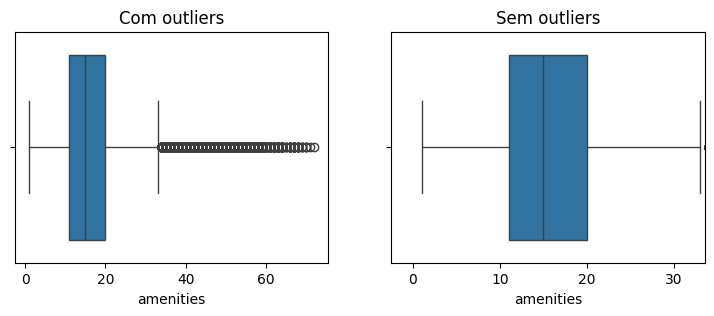

In [ ]:
box_plot(new_df['amenities'])

new_df, removed_lines = exclude_outliers(new_df, 'amenities')
print(f'Foram removidas {removed_lines} linhas')
print(new_df.isna().sum())

Codificando as colunas categoricas

In [ ]:
from sklearn.preprocessing import OneHotEncoder
categorical_columns = ['host_is_superhost', 'instant_bookable', 'property_type', 'room_type', 'cancellation_policy',]
new_df_codificado = new_df.copy()
encoder = OneHotEncoder(sparse_output=False)

for column in ['host_is_superhost', 'instant_bookable']:
    new_df_codificado[column] = new_df_codificado[column].replace({'t': 1, 'f': 0})
#camada de verificação de bug na codificação que apresentava valores nulos após o processo
print("Antes da codificação:")
print(new_df.isna().sum())
print("Valores nulos antes da codificação:")
print(new_df[categorical_columns].isnull().sum())

encoded_columns = ['property_type', 'room_type', 'cancellation_policy']
new_df_codificado = pd.get_dummies(data=new_df_codificado, columns=encoded_columns, drop_first=True)
print(new_df_codificado.head())
print(new_df_codificado.info())
print(new_df_codificado.head())
print(new_df_codificado.isna().sum())


Antes da codificação:
id                     0
number_of_reviews      0
host_is_superhost      0
host_listings_count    0
latitude               0
longitude              0
accommodates           0
bedrooms               0
beds                   0
bathrooms              0
extra_people           0
minimum_nights         0
instant_bookable       0
property_type          0
room_type              0
amenities              0
cancellation_policy    0
price                  0
dtype: int64
Valores nulos antes da codificação:
host_is_superhost      0
instant_bookable       0
property_type          0
room_type              0
cancellation_policy    0
dtype: int64
         id  number_of_reviews  host_is_superhost  host_listings_count  \
0    947924                4.0                  0                  5.0   
4   3742926                0.0                  0                  2.0   
5  16038668                0.0                  0                  1.0   
7  25165747                1.0               

Realizando o pré processamento dos dados do dataset de teste

In [ ]:
cols = [
    "id",
    "number_of_reviews",
    "host_is_superhost",
    "host_listings_count",
    "latitude",
    "longitude",
    "accommodates",
    "bedrooms",
    "beds",
    "bathrooms",
    "extra_people",
    "minimum_nights",
    "instant_bookable",
    "property_type",
    "room_type",
    "amenities",
    "cancellation_policy"
]

test_df = test_df[cols]


for column in test_df:
    if column in ['minimum_nights', 'extra_people', 'host_listings_count', 'accommodates']:
        if test_df[column].dtype == 'object':
            test_df[column] = test_df[column].str.replace('$', '')
            test_df[column] = test_df[column].str.replace(',', '')
            test_df[column] = pd.to_numeric(test_df[column], errors='coerce')
            test_df[column] = test_df[column].astype(np.float64, copy=False)

for column in test_df.columns:
    if test_df[column].dtype == 'object':
        mode_value = test_df[column].mode()[0]
        test_df[column].fillna(mode_value, inplace=True)
    elif test_df[column].dtype in ['float64']:
        mean_value = test_df[column].mean()
        test_df[column].fillna(mean_value, inplace=True)

test_df['property_type'] = test_df['property_type'].apply(lambda x: x if x in allowed_types else 'Other')

grouped_property_type_test = test_df['property_type'].value_counts().sort_index(ascending=False)
print(grouped_property_type_test)

test_df['cancellation_policy'] = test_df['cancellation_policy'].apply(lambda x: x if x in ['strict_14_with_grace_period', 'moderate', 'flexible'] else 'strict')

test_df['cancellation_policy'] = test_df['cancellation_policy'].replace({'strict_14_with_grace_period': 'strict with grace period'})


grouped_cancellation_policy_test = test_df['cancellation_policy'].value_counts().sort_index(ascending=False)
print(grouped_cancellation_policy_test)

for colunm in test_df['amenities']:
    if type(colunm) == str:
        colunm = colunm.replace('{', '')
        colunm = colunm.replace('}', '')
        colunm = colunm.replace('"', '')
test_df['amenities'] = test_df['amenities'].str.split(',').apply(len)


from sklearn.preprocessing import OneHotEncoder

categorical_columns = ['host_is_superhost', 'instant_bookable', 'property_type', 'room_type', 'cancellation_policy']
test_df_codificado = test_df.copy()

for column in ['host_is_superhost', 'instant_bookable']:
    test_df_codificado[column] = test_df_codificado[column].replace({'t': 1, 'f': 0})

encoded_columns = ['property_type', 'room_type', 'cancellation_policy']
test_df_codificado = pd.get_dummies(data=test_df_codificado, columns=encoded_columns, drop_first=True)


print(test_df_codificado.head())
print(test_df_codificado.info())
print(test_df_codificado.isna().sum())

property_type
Other           15897
House           20288
Condominium      9273
Apartment      150572
Name: count, dtype: int64
cancellation_policy
strict with grace period    76546
strict                       2693
moderate                    32931
flexible                    83860
Name: count, dtype: int64
      id  number_of_reviews  host_is_superhost  host_listings_count  \
0  17878              213.0                  0                  2.0   
1  25026              214.0                  0                  3.0   
2  46937                1.0                  0                  3.0   
3  48726               13.0                  1                  1.0   
4  51703              100.0                  0                  2.0   

    latitude  longitude  accommodates  bedrooms  beds  bathrooms  ...  \
0 -22.965919 -43.178962             5       2.0   2.0        1.0  ...   
1 -22.977117 -43.190454             3       1.0   2.0        1.0  ...   
2 -22.921990 -43.183836             3       

Estruturando o modelo

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression


train_df = new_df_codificado
test_df = test_df_codificado
sample_size = 100000
train_df_sampled = train_df.sample(n=sample_size, random_state=42)

X = train_df_sampled.drop('price', axis=1).values
y = train_df_sampled['price'].values



X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(test_df)


models = {
    'regressao_linear': LinearRegression(),
    'arvore_decisao': DecisionTreeRegressor(),
    'regressao_logistica': LogisticRegression(max_iter=1000)
}


def train_and_evaluate(models, X_train, X_val, y_train, y_val):
    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred_val = model.predict(X_val)
        mse = mean_squared_error(y_val, y_pred_val)
        mae = mean_absolute_error(y_val, y_pred_val)
        r2 = r2_score(y_val, y_pred_val)
        results[name] = {
            'MSE': mse,
            'MAE': mae,
            'R2': r2
        }
    return results


results = train_and_evaluate(models, X_train_scaled, X_val_scaled, y_train, y_val)


test_predictions = {}
for name, model in models.items():
    test_predictions[name] = model.predict(X_test_scaled)


for model_name, metrics in results.items():
    print(f"Resultados para {model_name}:")
    print(f"Mean Squared Error: {metrics['MSE']}")
    print(f"Mean Absolute Error: {metrics['MAE']}")
    print(f"R2 Score: {metrics['R2']}")
    print()

for model_name, y_pred in test_predictions.items():
    print(f"Previsões para {model_name} no conjunto de teste:")
    print(y_pred[:10])
    print()
    test_df = test_df_codificado.copy()
    test_df['id'] = range(len(test_df))
    results_df = pd.DataFrame({
    'ID': test_df['id'],
    'price': y_pred
    })
    results_df = results_df.sort_values(by='ID').reset_index(drop=True)
    results_df.to_csv(f"{model_name}_predictions.csv", index=False)
    print(f"Arquivo CSV gerado para {model_name}: {model_name}_predictions.csv")


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


Resultados para regressao_linear:
Mean Squared Error: 52074.58088899117
Mean Absolute Error: 168.64921780114508
R2 Score: 0.37842413745773995

Resultados para arvore_decisao:
Mean Squared Error: 11904.606078240078
Mean Absolute Error: 36.885754523809524
R2 Score: 0.8579034979257563

Resultados para regressao_logistica:
Mean Squared Error: 63842.5999
Mean Absolute Error: 166.0251
R2 Score: 0.23795797446020162

Previsões para regressao_linear no conjunto de teste:
[-4174.54193208 -4274.29063333   355.85451737   109.74539254
 -1929.48320966   384.83674903  -514.69943442   644.875405
  -779.23821717   306.44387614]

Arquivo CSV gerado para regressao_linear: regressao_linear_predictions.csv
Previsões para arvore_decisao no conjunto de teste:
[350.   390.   146.   385.   278.75  79.   998.   259.   297.   192.  ]

Arquivo CSV gerado para arvore_decisao: arvore_decisao_predictions.csv
Previsões para regressao_logistica no conjunto de teste:
[  0.   0. 199. 101.   0. 199.   0. 501. 731. 150.]


#Comparando as previsoes de cada modelo com os resultados reais

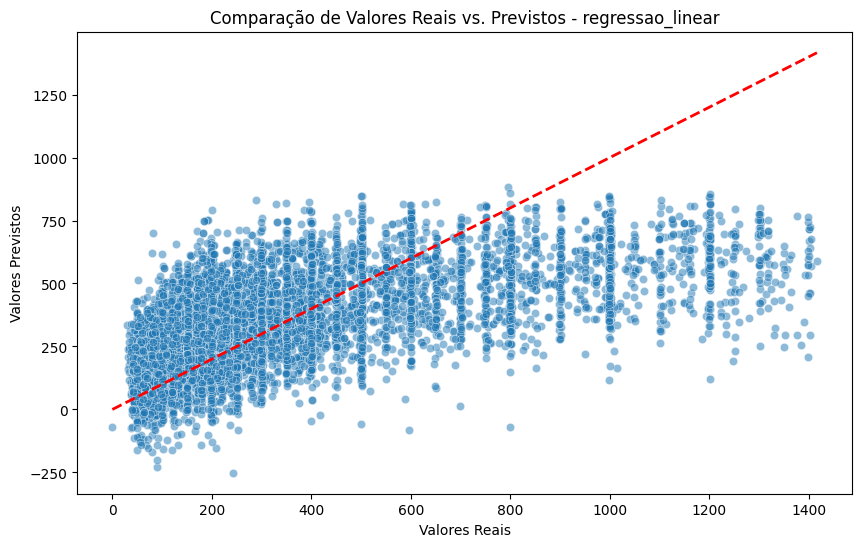

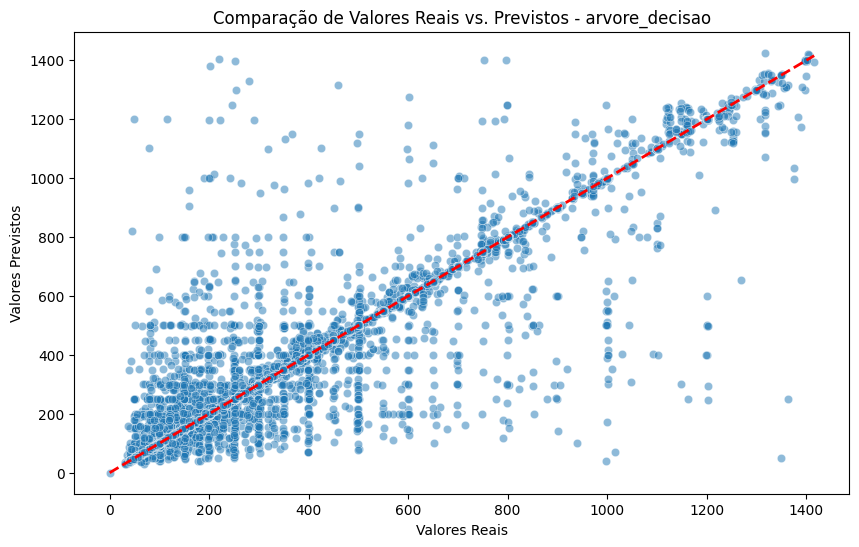

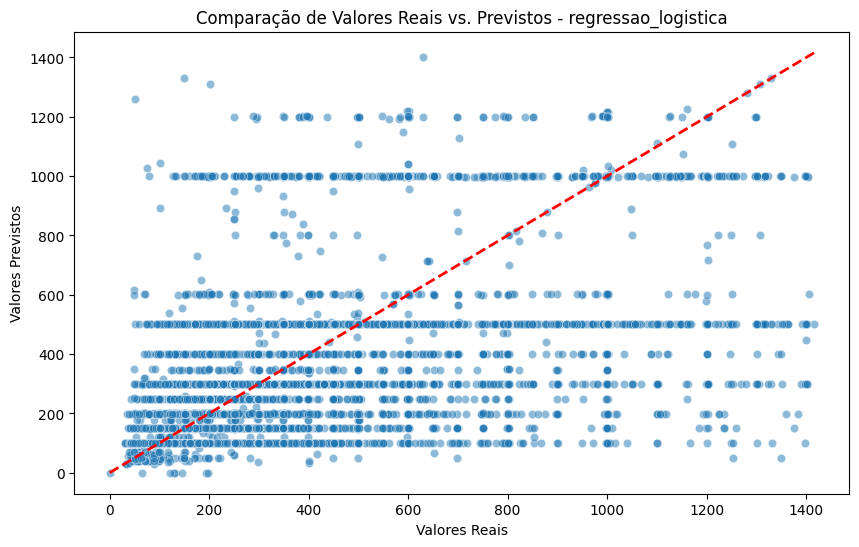

In [ ]:
def plot_comparison(y_true, y_pred, model_name):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_true, y=y_pred, alpha=0.5)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
    plt.xlabel('Valores Reais')
    plt.ylabel('Valores Previstos')
    plt.title(f'Comparação de Valores Reais vs. Previstos - {model_name}')
    plt.show()

for model_name, model in models.items():
    y_pred_val = model.predict(X_val_scaled)
    plot_comparison(y_val, y_pred_val, model_name)


Respostas aos topicos da lista



1.   a. Fazer uma análise no dataset utilizando as ferramentas aprendidas no
período;

b. Demonstrar como pré-processar e representar os diferentes tipos de
dados;

c. Demonstrar a utilização de técnicas como one-hot encoding, redução de
dimensionalidade e PCA;
i. Como a redução da dimensionalidade afetou no desempenho do
modelo?

d. Aplicar regressão nos dados - dividir o dataset em treinamento e
validação e aplicar, pelo menos, 3 algoritmos distintos de regressão para prever o preço do imóvel. Testar visualizar os resultados, comparando o desempenho dos modelos treinados;
i. Qual modelo performou melhor?

e. Avaliar o desempenho do(s) modelo(s) treinado(s). A métrica da
competição será o erro quadrático médio (MSE), porém, recomenda-se a avaliação do modelo por outras métricas adicionais, como o R2 e o erro médio absoluto (MAE).

Respostas:

1)a)b) Ambos os datasets foram submetidos aos mesmos procedimentos de tratamento e analise de dados. Inicialmente, foi visualizada a composição do dataset com o intuito de verificar quais colunas o integravam e quais seriam necessárias para a analíse. Foram inicialmente descartadas algumas colunas que não seriam relevantes para a análise e outras que possuiam mais de 30% dos valores como nulos. Após isso, foram efetuadas alterações nas colunas do tipo object que deveriam ser consideradas como dados númericos e ,por fim, foi realizada a imputação de dados faltantes utilizando duas medidas de tendência central (moda e média).

Para retirar os outliers, foi usado o metódo do intervalo interquartil (IQM), utilizando a visualização em box plot para verificar as diferenças na distribuição dos dados com e sem outliers e, após esta identificação, foram retiradas as linhas que continham outliers.

Após pré-processar as colunas que continham dados númericos, foi necessário analisar as colunas categóricas. Em primeiro plano, foi necessário visualizar a distribuição destes dados dentro de suas categorias, com o intuito de unficar categorias com menos recorrência e categorias redundates em uma unica classificação, este processo foi realizado na coluna "property_type" e "cancellation_policy". A coluna amenities foi tranformada em uma coluna numérica que continha o número de amenities que o respectivo estabelecimento tinha, após isso, foram identificados os outliers presentes e removidos. Em ultima instância, as colunas "host_is_superhost", "instant_bookable', "property_type", "room_type" e "cancellation_policy". As duas primeiras ja estavam pré-definidas em false e true, portanto foi necessário apenas realizar uma conversão para valores númericos (0 e 1). Já as 3 demais colunas, foi necessário codificar usando o onehotencoder de modo que, fossem convertidas em colunas de varíaveis booleanas (true e false) para cada categoria presente nas respectiva coluna.

Após realizar o pré processamento em ambos as bases, foi iniciado o procedimento de estruturação do modelo de previsão. Foram escolhidos três modelos para serem comparados conforme as metricas de avalação: LinearRegression, DecisionTreeRegressor e LogisticRegression.

Inicialmente, por motivos de processamento, foram utilizados somente 100000 amostras do conjunto de dados de treino. Os dados foram divididos em conjuntos de treino e teste e passaram por mais uma camada de processamento onde foram padronizados usando a função StandardScaler(), com o intuito de normalizar a distribuição dos dados. Após o treinamento, o modelo que melhor performou foi o DecisionTreeRegressor(), apresentando o menor MSE dos três e o maior valor para o coeficiente R2, demonstrando o quão bem estes dados se ajustaram a este respectivo modelo de regressão.



